#  SVM Classification (scikit-learn)

In [1]:
%%javascript
IPython.notebook.clear_all_output();

<IPython.core.display.Javascript object>

## Import an Internal Dataset

In [2]:
from sklearn.datasets import load_iris

iris = load_iris()
print(iris.target)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


In [3]:
import random

N = iris.target.shape[0]
indices = list(range(N))
random.shuffle(indices)
print(indices)

print()

iris.data = iris.data[indices]
iris.target = iris.target[indices]
print(iris.target)

[42, 59, 86, 25, 43, 20, 125, 81, 124, 67, 35, 63, 21, 51, 73, 11, 24, 4, 71, 138, 141, 52, 39, 110, 0, 7, 23, 61, 92, 19, 50, 106, 94, 36, 91, 96, 31, 137, 22, 134, 143, 69, 115, 102, 29, 108, 114, 103, 3, 111, 27, 32, 147, 133, 97, 55, 79, 5, 49, 148, 62, 132, 95, 80, 100, 90, 38, 44, 105, 13, 146, 123, 70, 2, 40, 8, 127, 119, 53, 16, 26, 118, 98, 84, 1, 45, 68, 56, 85, 136, 10, 129, 116, 93, 66, 9, 122, 6, 76, 87, 77, 82, 107, 37, 54, 17, 58, 88, 57, 74, 128, 142, 65, 120, 28, 64, 46, 135, 113, 12, 101, 34, 131, 47, 33, 60, 83, 145, 140, 18, 112, 41, 126, 149, 117, 75, 139, 121, 130, 144, 104, 109, 89, 99, 15, 48, 30, 78, 72, 14]

[0 1 1 0 0 0 2 1 2 1 0 1 0 1 1 0 0 0 1 2 2 1 0 2 0 0 0 1 1 0 1 2 1 0 1 1 0
 2 0 2 2 1 2 2 0 2 2 2 0 2 0 0 2 2 1 1 1 0 0 2 1 2 1 1 2 1 0 0 2 0 2 2 1 0
 0 0 2 2 1 0 0 2 1 1 0 0 1 1 1 2 0 2 2 1 1 0 2 0 1 1 1 1 2 0 1 0 1 1 1 1 2
 2 1 2 0 1 0 2 2 0 2 0 2 0 0 1 1 2 2 0 2 0 2 2 2 1 2 2 2 2 2 2 1 1 0 0 0 1
 1 0]


In [4]:
# 120 tuples for training, 30 for testing
X_train = iris.data[:120]
print(X_train.shape)
X_test = iris.data[120:]
print(X_test.shape)
y_train = iris.target[:120]
print(y_train.shape)
y_test = iris.target[120:]
print(y_test.shape)

(120, 4)
(30, 4)
(120,)
(30,)


# sklearn.svm.SVC

# 1. Linear Kernel: 

## Training
**C : float, optional (default=1.0):** Penalty parameter C of the error term.

Difference from SVR: there is no "epsilon"

In [5]:
from sklearn import svm
import numpy as np

model = svm.SVC(kernel = 'linear', C = 1)

# training
model.fit(X_train, y_train)

# testing
y_predict = model.predict(X_test)
n_report = 10
print(y_predict[range(n_report)])
print(y_test[:n_report])
print('Accuracy: %f%%' % (np.mean(y_predict == y_test),))

[2 0 2 0 0 1 2 2 2 0]
[2 0 2 0 0 1 1 2 2 0]
Accuracy: 0.933333%


## Grid Search for Hyperparameters

See how to use `sklearn.model_selection.GridSearchCV(.)` :-)

In [35]:
from sklearn.model_selection import GridSearchCV
# create a model with some fixed hyperparameters
model = svm.SVC(kernel = 'linear')
# create a dictionary of hyperparameters (of the model) for grid search
exp = 6
vals = np.logspace(-exp, exp, 2*exp+1) # base 10
print(vals)
params = {
    'C': vals
}
# grid search
gridsearch = GridSearchCV(estimator = model, param_grid = params, verbose = 1)
# set verbose = 2 if you want to see the progress of each model training
gridsearch.fit(X_train, y_train);

# print results
print("====== Scores for all models ======")
display(['mean', 'std', 'params'])
display(list(zip(gridsearch.cv_results_['mean_test_score'], gridsearch.cv_results_['std_test_score'], gridsearch.cv_results_['params']))) # IPython.display, a better looking function than print()
print()

print("====== Parameters for the best model ======")
print(gridsearch.best_params_)
print()

print("====== Score for the best model ======")
print(gridsearch.best_score_)

[1.e-06 1.e-05 1.e-04 1.e-03 1.e-02 1.e-01 1.e+00 1.e+01 1.e+02 1.e+03
 1.e+04 1.e+05 1.e+06]
Fitting 3 folds for each of 13 candidates, totalling 39 fits
====== Scores for all models ======


/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  39 out of  39 | elapsed:    0.0s finished
/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


['mean', 'std', 'params']

[(0.35833333333333334, 0.006527231646770835, {'C': 1e-06}),
 (0.35833333333333334, 0.006527231646770835, {'C': 1e-05}),
 (0.35833333333333334, 0.006527231646770835, {'C': 0.0001}),
 (0.35833333333333334, 0.006527231646770835, {'C': 0.001}),
 (0.75, 0.023222173347924247, {'C': 0.01}),
 (0.95, 0.02004203941111067, {'C': 0.1}),
 (0.975, 0.019908326484529903, {'C': 1.0}),
 (0.9833333333333333, 0.012009611535381545, {'C': 10.0}),
 (0.9666666666666667, 0.0117961632922642, {'C': 100.0}),
 (0.975, 0.020542846614053947, {'C': 1000.0}),
 (0.975, 0.020542846614053947, {'C': 10000.0}),
 (0.975, 0.020542846614053947, {'C': 100000.0}),
 (0.975, 0.020542846614053947, {'C': 1000000.0})]


====== Parameters for the best model ======
{'C': 10.0}

====== Score for the best model ======
0.9833333333333333


## Put in the best parameters

In [36]:
model = gridsearch.best_estimator_

# testing
y_predict = model.predict(X_test)
print('Accuracy: %f%%' % (np.mean(y_predict == y_test),))

Accuracy: 0.933333%


## Next: kernel functions:

Check their definitions first: http://scikit-learn.org/dev/modules/svm.html#kernel-functions

# 2. RBF Kernel: 

## Training
**gamma : float, optional (default=’auto’):** Kernel coefficient

**C : float, optional (default=1.0):** Penalty parameter C of the error term.

In [37]:
model = svm.SVC(kernel = 'rbf')
# create a dictionary of hyperparameters (of the model) for grid search
exp = 6
vals = np.logspace(-exp, exp, 2*exp+1) # base 10
print(vals)
params = {
    'gamma': vals,
    'C': vals
}
# grid search
gridsearch = GridSearchCV(estimator = model, param_grid = params, verbose = 1)
# set verbose = 2 if you want to see the progress of each model training
gridsearch.fit(X_train, y_train);

# print results
print("====== Scores for all models ======")
display(['mean', 'std', 'params'])
display(list(zip(gridsearch.cv_results_['mean_test_score'], gridsearch.cv_results_['std_test_score'], gridsearch.cv_results_['params']))) # IPython.display, a better looking function than print()
print()

print("====== Parameters for the best model ======")
print(gridsearch.best_params_)
print()

print("====== Score for the best model ======")
print(gridsearch.best_score_)

[1.e-06 1.e-05 1.e-04 1.e-03 1.e-02 1.e-01 1.e+00 1.e+01 1.e+02 1.e+03
 1.e+04 1.e+05 1.e+06]
Fitting 3 folds for each of 169 candidates, totalling 507 fits


/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


====== Scores for all models ======


[Parallel(n_jobs=1)]: Done 507 out of 507 | elapsed:    0.7s finished
/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


['mean', 'std', 'params']

[(0.35833333333333334, 0.006527231646770835, {'C': 1e-06, 'gamma': 1e-06}),
 (0.35833333333333334, 0.006527231646770835, {'C': 1e-06, 'gamma': 1e-05}),
 (0.35833333333333334, 0.006527231646770835, {'C': 1e-06, 'gamma': 0.0001}),
 (0.35833333333333334, 0.006527231646770835, {'C': 1e-06, 'gamma': 0.001}),
 (0.35833333333333334, 0.006527231646770835, {'C': 1e-06, 'gamma': 0.01}),
 (0.35833333333333334, 0.006527231646770835, {'C': 1e-06, 'gamma': 0.1}),
 (0.35833333333333334, 0.006527231646770835, {'C': 1e-06, 'gamma': 1.0}),
 (0.35833333333333334, 0.006527231646770835, {'C': 1e-06, 'gamma': 10.0}),
 (0.35833333333333334, 0.006527231646770835, {'C': 1e-06, 'gamma': 100.0}),
 (0.35833333333333334, 0.006527231646770835, {'C': 1e-06, 'gamma': 1000.0}),
 (0.35833333333333334, 0.006527231646770835, {'C': 1e-06, 'gamma': 10000.0}),
 (0.35833333333333334, 0.006527231646770835, {'C': 1e-06, 'gamma': 100000.0}),
 (0.35833333333333334, 0.006527231646770835, {'C': 1e-06, 'gamma': 1000000.0}),
 (0.358


====== Parameters for the best model ======
{'C': 10.0, 'gamma': 0.1}

====== Score for the best model ======
0.9833333333333333


In [38]:
model = gridsearch.best_estimator_

# testing
y_predict = model.predict(X_test)
print('Accuracy: %f%%' % (np.mean(y_predict == y_test),))

Accuracy: 0.933333%


## Confusion Matrix

sklearn.metrics.confusion_matrix(y_true, y_pred, labels=None, sample_weight=None)

In [39]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_predict)
cm

array([[ 9,  0,  0],
       [ 0,  5,  2],
       [ 0,  0, 14]])

**The previous function just computes the matrix, the next one plots it:**

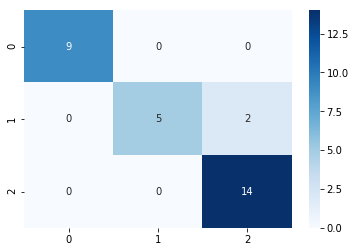

In [41]:
import seaborn as sn
import matplotlib.pyplot as plt # need this to plot after calling sn.heatmap(.)

sn.heatmap(cm, annot=True, cmap="Blues")

# 3. Polynomial Kernel: 

## Training
**degree : int, optional (default=3):** Degree of the polynomial kernel function (‘poly’). Ignored by all other kernels.

**C : float, optional (default=1.0):** Penalty parameter C of the error term.

**Others: gamma, coef0**

In [43]:
model = svm.SVC(kernel = 'poly')
# create a dictionary of hyperparameters (of the model) for grid search
degs = range(1, 3)
print('deg:', list(degs))
start = 20
end = 30
size = end - start + 1
gamma_vals = np.logspace(start, end, size) # base 10
print('gamma:', gamma_vals)
C_vals = np.logspace(-end, -start, size) # base 10
print('C: ',C_vals)
params = {
    'degree': degs,
    'gamma': gamma_vals,
    'C': C_vals
}

# grid search
gridsearch = GridSearchCV(estimator = model, param_grid = params, verbose = 2, n_jobs = -1)
# by setting verbose = 2, we can see that runtime increases quickly with larger (degree, C, gamma)
# by setting n_jobs = -1, we use all CPU cores in parallel to train the models
gridsearch.fit(X_train, y_train);

# print results
print("====== Scores for all models ======")
display(['mean', 'std', 'params'])
display(list(zip(gridsearch.cv_results_['mean_test_score'], gridsearch.cv_results_['std_test_score'], gridsearch.cv_results_['params']))) # IPython.display, a better looking function than print()
print()

print("====== Parameters for the best model ======")
print(gridsearch.best_params_)
print()

print("====== Score for the best model ======")
print(gridsearch.best_score_)

deg: [1, 2]
gamma: [1.e+20 1.e+21 1.e+22 1.e+23 1.e+24 1.e+25 1.e+26 1.e+27 1.e+28 1.e+29
 1.e+30]
C:  [1.e-30 1.e-29 1.e-28 1.e-27 1.e-26 1.e-25 1.e-24 1.e-23 1.e-22 1.e-21
 1.e-20]
Fitting 3 folds for each of 242 candidates, totalling 726 fits


/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


====== Scores for all models ======


[Parallel(n_jobs=-1)]: Done 726 out of 726 | elapsed:    0.3s finished
/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


['mean', 'std', 'params']

[(0.35833333333333334,
  0.006527231646770835,
  {'C': 1e-30, 'degree': 1, 'gamma': 1e+20}),
 (0.35833333333333334,
  0.006527231646770835,
  {'C': 1e-30, 'degree': 1, 'gamma': 1e+21}),
 (0.35833333333333334,
  0.006527231646770835,
  {'C': 1e-30, 'degree': 1, 'gamma': 1e+22}),
 (0.35833333333333334,
  0.006527231646770835,
  {'C': 1e-30, 'degree': 1, 'gamma': 1e+23}),
 (0.35833333333333334,
  0.006527231646770835,
  {'C': 1e-30, 'degree': 1, 'gamma': 1e+24}),
 (0.35833333333333334,
  0.006527231646770835,
  {'C': 1e-30, 'degree': 1, 'gamma': 1e+25}),
 (0.35833333333333334,
  0.006527231646770835,
  {'C': 1e-30, 'degree': 1, 'gamma': 1e+26}),
 (0.35833333333333334,
  0.006527231646770835,
  {'C': 1e-30, 'degree': 1, 'gamma': 1e+27}),
 (0.75, 0.023222173347924247, {'C': 1e-30, 'degree': 1, 'gamma': 1e+28}),
 (0.95, 0.02004203941111067, {'C': 1e-30, 'degree': 1, 'gamma': 1e+29}),
 (0.975, 0.019908326484529903, {'C': 1e-30, 'degree': 1, 'gamma': 1e+30}),
 (0.3, 0.006125638918316903, {'C':


====== Parameters for the best model ======
{'C': 1e-29, 'degree': 1, 'gamma': 1e+30}

====== Score for the best model ======
0.9833333333333333


In [44]:
model = gridsearch.best_estimator_

# testing
y_predict = model.predict(X_test)
print('Accuracy: %f%%' % (np.mean(y_predict == y_test),))

Accuracy: 0.933333%


# 4. Sigmoidal Kernel: 

## Training
**gamma : float, optional (default=’auto’):** Kernel coefficient
        
**C : float, optional (default=1.0):** Penalty parameter C of the error term.
        
**Others: coef0**

In [45]:
model = svm.SVC(kernel = 'sigmoid')
# create a dictionary of hyperparameters (of the model) for grid search
start = 1
end = 8
size = end - start + 1
gamma_vals = np.logspace(-end, -start, size) # base 10
print('gamma:', gamma_vals)
C_vals = np.logspace(start, end, size) # base 10
print('C: ',C_vals)
params = {
    'C': C_vals, # expensive when C is large
    'gamma': gamma_vals
}

# grid search
gridsearch = GridSearchCV(estimator = model, param_grid = params, verbose = 2, n_jobs = -1)
# by setting verbose = 2, we can see that runtime increases quickly with larger (degree, C, gamma)
# by setting n_jobs = -1, we use all CPU cores in parallel to train the models
gridsearch.fit(X_train, y_train);

# print results
print("====== Scores for all models ======")
display(['mean', 'std', 'params'])
display(list(zip(gridsearch.cv_results_['mean_test_score'], gridsearch.cv_results_['std_test_score'], gridsearch.cv_results_['params']))) # IPython.display, a better looking function than print()
print()

print("====== Parameters for the best model ======")
print(gridsearch.best_params_)
print()

print("====== Score for the best model ======")
print(gridsearch.best_score_)

gamma: [1.e-08 1.e-07 1.e-06 1.e-05 1.e-04 1.e-03 1.e-02 1.e-01]
C:  [1.e+01 1.e+02 1.e+03 1.e+04 1.e+05 1.e+06 1.e+07 1.e+08]
Fitting 3 folds for each of 64 candidates, totalling 192 fits
====== Scores for all models ======


/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done 192 out of 192 | elapsed:    0.1s finished
/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


['mean', 'std', 'params']

[(0.35833333333333334, 0.006527231646770835, {'C': 10.0, 'gamma': 1e-08}),
 (0.35833333333333334, 0.006527231646770835, {'C': 10.0, 'gamma': 1e-07}),
 (0.35833333333333334, 0.006527231646770835, {'C': 10.0, 'gamma': 1e-06}),
 (0.35833333333333334, 0.006527231646770835, {'C': 10.0, 'gamma': 1e-05}),
 (0.35833333333333334, 0.006527231646770835, {'C': 10.0, 'gamma': 0.0001}),
 (0.75, 0.023222173347924247, {'C': 10.0, 'gamma': 0.001}),
 (0.975, 0.020929266304249385, {'C': 10.0, 'gamma': 0.01}),
 (0.35833333333333334, 0.006527231646770835, {'C': 10.0, 'gamma': 0.1}),
 (0.35833333333333334, 0.006527231646770835, {'C': 100.0, 'gamma': 1e-08}),
 (0.35833333333333334, 0.006527231646770835, {'C': 100.0, 'gamma': 1e-07}),
 (0.35833333333333334, 0.006527231646770835, {'C': 100.0, 'gamma': 1e-06}),
 (0.35833333333333334, 0.006527231646770835, {'C': 100.0, 'gamma': 1e-05}),
 (0.75, 0.023222173347924247, {'C': 100.0, 'gamma': 0.0001}),
 (0.9416666666666667, 0.01182925217435053, {'C': 100.0, 'gamma': 


====== Parameters for the best model ======
{'C': 10000.0, 'gamma': 0.001}

====== Score for the best model ======
0.9833333333333333


In [46]:
model = gridsearch.best_estimator_

# testing
y_predict = model.predict(X_test)
print('Accuracy: %f%%' % (np.mean(y_predict == y_test),))

Accuracy: 0.933333%


THE END